# Let's understand MET dataset

load `.csv` file and analyze the data

In [1]:
import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Let's load dataset
dataset_name = 'met'

if dataset_name not in ['met', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    CSV_FILENAME = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    CSV_FILENAME = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_with_head.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_wo_ub.csv') # cleaned up
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity_20180618.csv') # joint rechecked! (2018.06.18) 
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10.csv') # joint rechecked! (2018.06.18)    
    CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10_ub_new.csv') # MET3    
    
    # for debugging
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #CSV_FILENAME = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info

    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(CSV_FILENAME)
print(IMG_PATH_PREFIX)

met_dataset = dataset.PoseDataset(
    CSV_FILENAME,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)


2it [00:00, 12.74it/s]

/var/data/MET3/activity-met_n10_ub_new.csv
/var/data/MET3
Reading dataset from /var/data/MET3/activity-met_n10_ub_new.csv
Downscale image/office activities/filing.seated/1.jpg to the height 400px
Downscale image/office activities/filing.seated/10.jpeg to the height 400px
[2] /var/data/MET3/image/office activities/filing.seated/11.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 76.  99.]
 [ 98.  96.]
 [102.  52.]
 [158.  56.]
 [140. 104.]
 [113. 112.]
 [130.  48.]
 [129.   8.]]


5it [00:00, 11.52it/s]

Downscale image/office activities/filing.seated/12.jpeg to the height 400px
Downscale image/office activities/filing.seated/13.jpeg to the height 400px
[5] /var/data/MET3/image/office activities/filing.seated/14.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 78. 119.]
 [ 44. 115.]
 [ 43.  82.]
 [ 75.  81.]
 [ 77. 106.]
 [ 86. 106.]
 [ 62.  77.]
 [ 68.  50.]]
[6] /var/data/MET3/image/office activities/filing.seated/15.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 20.  84.]
 [  1. 110.]
 [ 37.  68.]
 [103.  72.]
 [129. 140.]
 [100. 109.]
 [ 68.  61.]
 [ 72.   9.]]
[8] /var/data/MET3/image/office activities/filing.seated/17.bmp contains non-valid joints
[0 0 0 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [129. 149.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 67. 132.]
 [ 78. 124.]
 [ 94. 102.]
 [120

11it [00:00, 19.84it/s]

Downscale image/office activities/filing.seated/19.jpeg to the height 400px
Downscale image/office activities/filing.seated/2.jpeg to the height 400px


17it [00:01, 16.75it/s]

Downscale image/office activities/filing.seated/20.jpeg to the height 400px
[13] /var/data/MET3/image/office activities/filing.seated/21.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [114. 178.]
 [191. 195.]
 [180. 208.]
 [102. 190.]
 [127. 241.]
 [ 94. 100.]
 [126. 107.]
 [175. 109.]
 [147. 116.]
 [103. 168.]
 [ 62. 189.]
 [155.  98.]
 [139.  57.]]
Downscale image/office activities/filing.seated/22.jpg to the height 400px
[14] /var/data/MET3/image/office activities/filing.seated/22.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [222. 460.]
 [122. 431.]
 [ 98. 240.]
 [320. 212.]
 [337. 351.]
 [401. 372.]
 [237. 212.]
 [234.  32.]]
Downscale image/office activities/filing.seated/24.jpeg to the height 400px
Downscale image/office activities/filing.seated/25.jpg to the height 400px
[17] /var/data/MET3/image/office activities/filing.seated/25.jpg contains non-valid joints

22it [00:01, 17.23it/s]

Downscale image/office activities/filing.seated/27.jpeg to the height 400px
[20] /var/data/MET3/image/office activities/filing.seated/28.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [164. 230.]
 [ 53. 225.]
 [101. 199.]
 [183. 231.]
 [ -1.  -1.]
 [182. 160.]
 [129. 190.]
 [ 85. 121.]
 [132. 115.]
 [162. 141.]
 [200. 140.]
 [119.  97.]
 [140.  59.]]
Downscale image/office activities/filing.seated/29.jpeg to the height 400px


24it [00:01, 16.63it/s]

Downscale image/office activities/filing.seated/3.jpeg to the height 400px
Downscale image/office activities/filing.seated/30.jpg to the height 400px
[23] /var/data/MET3/image/office activities/filing.seated/30.jpg contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ 56. 388.]
 [137. 288.]
 [ 14. 272.]
 [ 60. 272.]
 [ 62. 401.]
 [ -1.  -1.]
 [157. 197.]
 [ 84. 190.]
 [ 34. 138.]
 [ 81. 151.]
 [105. 229.]
 [144. 190.]
 [ 62. 124.]
 [ 83.  65.]]
Downscale image/office activities/filing.seated/31.jpeg to the height 400px


29it [00:01, 15.82it/s]

Downscale image/office activities/filing.seated/32.jpeg to the height 400px
Downscale image/office activities/filing.seated/33.jpg to the height 400px
[26] /var/data/MET3/image/office activities/filing.seated/33.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [213. 779.]
 [353. 673.]
 [474. 668.]
 [480. 793.]
 [ -1.  -1.]
 [195. 454.]
 [244. 473.]
 [298. 424.]
 [435. 393.]
 [506. 446.]
 [343. 440.]
 [346. 401.]
 [275. 309.]]
Downscale image/office activities/filing.seated/34.jpg to the height 400px
[27] /var/data/MET3/image/office activities/filing.seated/34.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [321. 310.]
 [481. 338.]
 [523. 365.]
 [348. 365.]
 [481. 403.]
 [264. 274.]
 [352. 291.]
 [388. 181.]
 [449. 174.]
 [362. 274.]
 [272. 214.]
 [409. 143.]
 [402.  54.]]
Downscale image/office activities/filing.seated/35.jpeg to the height 400px
[29] /var/data/MET3/image/office activities/filing.seated/36.jpg contains non-valid joints

37it [00:02, 17.32it/s]

Downscale image/office activities/filing.seated/4.jpeg to the height 400px
Downscale image/office activities/filing.seated/40.jpg to the height 400px
Downscale image/office activities/filing.seated/41.jpg to the height 400px
[35] /var/data/MET3/image/office activities/filing.seated/41.jpg contains non-valid joints
[0 1 0 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [313. 789.]
 [ -1.  -1.]
 [791. 922.]
 [ -1.  -1.]
 [ -1.  -1.]
 [458. 420.]
 [527. 526.]
 [631. 376.]
 [857. 482.]
 [647. 793.]
 [385. 637.]
 [768. 335.]
 [615.  45.]]
Downscale image/office activities/filing.seated/42.jpeg to the height 400px
[37] /var/data/MET3/image/office activities/filing.seated/43.jpg contains non-valid joints
[0 1 0 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 82. 155.]
 [ -1.  -1.]
 [ 94. 161.]
 [200. 179.]
 [ -1.  -1.]
 [127.  92.]
 [137. 112.]
 [148.  72.]
 [213.  78.]
 [178. 143.]
 [121. 148.]
 [176.  61.]
 [155.  14.]]
[38] /var/data/MET3/image/office activities/filing.seated/44.jpg contains non-valid joints


42it [00:02, 17.04it/s]

Downscale image/office activities/filing.seated/45.jpeg to the height 400px
Downscale image/office activities/filing.seated/47.jpeg to the height 400px


46it [00:02, 16.63it/s]

Downscale image/office activities/filing.seated/49.jpeg to the height 400px
Downscale image/office activities/filing.seated/5.jpeg to the height 400px


51it [00:03, 16.63it/s]

Downscale image/office activities/filing.seated/51.jpeg to the height 400px
Downscale image/office activities/filing.seated/52.jpg to the height 400px
[47] /var/data/MET3/image/office activities/filing.seated/52.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [800. 655.]
 [699. 508.]
 [896. 505.]
 [742. 568.]
 [ -1.  -1.]
 [515. 477.]
 [625. 390.]
 [670. 266.]
 [937. 294.]
 [844. 478.]
 [713. 504.]
 [808. 254.]
 [790.  85.]]
Downscale image/office activities/filing.seated/53.jpg to the height 400px
[48] /var/data/MET3/image/office activities/filing.seated/53.jpg contains non-valid joints
[1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[[417. 324.]
 [381. 215.]
 [588. 194.]
 [ -1.  -1.]
 [472. 221.]
 [451. 369.]
 [299. 283.]
 [374. 197.]
 [421. 135.]
 [512.  89.]
 [494. 193.]
 [416. 206.]
 [462.  93.]
 [423.  12.]]
Downscale image/office activities/filing.seated/55.jpeg to the height 400px
[51] /var/data/MET3/image/office activities/filing.seated/56.jpg contains non-valid joints

62it [00:03, 18.16it/s]

Downscale image/office activities/filing.seated/58.jpeg to the height 400px
Downscale image/office activities/filing.seated/59.jpg to the height 400px
[54] /var/data/MET3/image/office activities/filing.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 78. 453.]
 [105. 610.]
 [370. 392.]
 [854. 523.]
 [580. 803.]
 [295. 609.]
 [611. 454.]
 [728. 116.]]
Downscale image/office activities/filing.seated/6.png to the height 400px
[56] /var/data/MET3/image/office activities/filing.seated/60.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [147. 196.]
 [ 96. 176.]
 [126. 162.]
 [147. 171.]
 [ -1.  -1.]
 [157. 128.]
 [130. 129.]
 [ 93.  93.]
 [134.  99.]
 [137. 119.]
 [163. 118.]
 [117.  81.]
 [136.  41.]]
[60] /var/data/MET3/image/office activities/filing.stand/1.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ 33. 143.]
 [ 61. 14

65it [00:03, 17.84it/s]

Downscale image/office activities/filing.stand/12.jpeg to the height 400px
Downscale image/office activities/filing.stand/13.jpeg to the height 400px


68it [00:03, 17.55it/s]

Downscale image/office activities/filing.stand/14.jpeg to the height 400px
Downscale image/office activities/filing.stand/16.jpeg to the height 400px
[70] /var/data/MET3/image/office activities/filing.stand/19.bmp contains non-valid joints
[0 1 1 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [137. 125.]
 [133.  99.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [133.  86.]
 [127.  81.]
 [133.  65.]
 [157.  66.]
 [153.  84.]
 [159.  84.]
 [146.  65.]
 [150.  53.]]
[71] /var/data/MET3/image/office activities/filing.stand/2.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [210. 128.]
 [191. 129.]
 [ -1.  -1.]
 [ -1.  -1.]
 [171.  35.]
 [193.  45.]
 [213.  42.]
 [205.  48.]
 [169.  63.]
 [154.  52.]
 [203.  36.]
 [194.   5.]]


73it [00:03, 18.29it/s]

Downscale image/office activities/filing.stand/20.jpeg to the height 400px
Downscale image/office activities/filing.stand/21.jpeg to the height 400px


76it [00:04, 17.81it/s]

Downscale image/office activities/filing.stand/22.jpeg to the height 400px
Downscale image/office activities/filing.stand/23.jpg to the height 400px
[75] /var/data/MET3/image/office activities/filing.stand/23.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [504. 448.]
 [496. 371.]
 [542. 355.]
 [535. 459.]
 [ -1.  -1.]
 [436. 246.]
 [479. 235.]
 [504. 166.]
 [553. 170.]
 [515. 262.]
 [446. 265.]
 [520. 143.]
 [491.  85.]]
Downscale image/office activities/filing.stand/24.jpeg to the height 400px


79it [00:04, 16.88it/s]

Downscale image/office activities/filing.stand/25.jpeg to the height 400px
Downscale image/office activities/filing.stand/26.jpeg to the height 400px


83it [00:04, 16.72it/s]

Downscale image/office activities/filing.stand/28.jpeg to the height 400px
Downscale image/office activities/filing.stand/29.jpeg to the height 400px
[82] /var/data/MET3/image/office activities/filing.stand/3.bmp contains non-valid joints
[1 1 1 1 0 0 1 1 1 1 1 1 1 1]
[[ 92. 182.]
 [ 92. 149.]
 [ 82. 111.]
 [101. 109.]
 [ -1.  -1.]
 [ -1.  -1.]
 [103.  90.]
 [ 82.  84.]
 [ 68.  54.]
 [101.  46.]
 [110.  73.]
 [120.  77.]
 [ 90.  46.]
 [ 94.  18.]]


87it [00:05, 16.54it/s]

Downscale image/office activities/filing.stand/31.jpeg to the height 400px
Downscale image/office activities/filing.stand/32.jpg to the height 400px
Downscale image/office activities/filing.stand/33.jpeg to the height 400px


89it [00:05, 16.52it/s]

Downscale image/office activities/filing.stand/34.jpeg to the height 400px
Downscale image/office activities/filing.stand/36.jpeg to the height 400px


95it [00:05, 16.34it/s]

Downscale image/office activities/filing.stand/37.jpeg to the height 400px
[93] /var/data/MET3/image/office activities/filing.stand/4.bmp contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 42. 180.]
 [ 32. 135.]
 [ 53. 124.]
 [ 59. 178.]
 [ -1.  -1.]
 [ 40. 133.]
 [ 21. 104.]
 [ 24.  68.]
 [ 28.  43.]
 [ 43.  74.]
 [ 76.  70.]
 [ 32.  37.]
 [ 45.   7.]]
Downscale image/office activities/filing.stand/40.jpeg to the height 400px
Downscale image/office activities/filing.stand/41.jpg to the height 400px
[95] /var/data/MET3/image/office activities/filing.stand/41.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [356. 520.]
 [409. 515.]
 [ -1.  -1.]
 [ -1.  -1.]
 [268. 291.]
 [333. 361.]
 [392. 268.]
 [402. 284.]
 [318. 368.]
 [246. 353.]
 [403. 254.]
 [376. 156.]]
Downscale image/office activities/filing.stand/42.jpg to the height 400px
[97] /var/data/MET3/image/office activities/filing.stand/43.jpg contains non-valid joints
[0 0 1 

102it [00:05, 17.02it/s]

Downscale image/office activities/filing.stand/47.jpeg to the height 400px
[102] /var/data/MET3/image/office activities/filing.stand/48.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [189. 386.]
 [202. 306.]
 [169. 304.]
 [167. 388.]
 [ -1.  -1.]
 [101.  89.]
 [130. 100.]
 [208. 131.]
 [182. 158.]
 [116. 209.]
 [ 70. 142.]
 [174. 130.]
 [183.  61.]]
Downscale image/office activities/filing.stand/5.jpeg to the height 400px


108it [00:06, 16.88it/s]

Downscale image/office activities/filing.stand/49.jpeg to the height 400px
[105] /var/data/MET3/image/office activities/filing.stand/50.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [254. 222.]
 [291. 224.]
 [ -1.  -1.]
 [ -1.  -1.]
 [201. 137.]
 [239. 152.]
 [261. 109.]
 [297. 117.]
 [254. 182.]
 [198. 161.]
 [280.  99.]
 [267.  49.]]
[106] /var/data/MET3/image/office activities/filing.stand/51.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [223. 280.]
 [217. 230.]
 [247. 233.]
 [244. 282.]
 [ -1.  -1.]
 [206. 108.]
 [221. 133.]
 [230. 149.]
 [246. 163.]
 [246. 206.]
 [232. 243.]
 [238. 151.]
 [240. 114.]]
Downscale image/office activities/filing.stand/52.jpeg to the height 400px


114it [00:06, 16.97it/s]

Downscale image/office activities/filing.stand/53.jpeg to the height 400px
Downscale image/office activities/filing.stand/54.jpg to the height 400px
Downscale image/office activities/filing.stand/56.PNG to the height 400px
Downscale image/office activities/filing.stand/58.jpeg to the height 400px
Downscale image/office activities/filing.stand/59.PNG to the height 400px
[114] /var/data/MET3/image/office activities/filing.stand/59.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [275. 238.]
 [236. 331.]
 [137. 272.]
 [152. 237.]
 [240. 219.]
 [269. 161.]
 [138. 211.]
 [143. 125.]]
[116] /var/data/MET3/image/office activities/filing.stand/60.PNG contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [416. 116.]
 [353. 232.]
 [175. 191.]
 [255. 140.]
 [366. 100.]
 [441.  35.]
 [202. 128.]
 [185.  23.]]
[117] /var/data/MET3

139it [00:06, 20.36it/s]

[129] /var/data/MET3/image/office activities/reading.seated/18.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [132. 109.]
 [101. 131.]
 [ 66.  79.]
 [ 40.  63.]
 [ 62.  99.]
 [103.  92.]
 [ 65.  60.]
 [ 94.  22.]]
Downscale image/office activities/reading.seated/2.bmp to the height 400px
[131] /var/data/MET3/image/office activities/reading.seated/2.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [286. 428.]
 [108. 458.]
 [116. 272.]
 [305. 257.]
 [397. 429.]
 [371. 263.]
 [277. 203.]
 [361.  95.]]
[132] /var/data/MET3/image/office activities/reading.seated/20.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 99. 137.]
 [ 89. 135.]
 [116.  76.]
 [189.  75.]
 [207. 143.]
 [167. 110.]
 [145.  73.]
 [129.  31.]]
Downscal

162it [00:07, 21.95it/s]

Downscale image/office activities/reading.seated/27.png to the height 400px
Downscale image/office activities/reading.seated/28.jpg to the height 400px
[140] /var/data/MET3/image/office activities/reading.seated/28.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [764. 523.]
 [852. 561.]
 [860. 337.]
 [888. 379.]
 [927. 627.]
 [748. 629.]
 [810. 308.]
 [638. 201.]]
[142] /var/data/MET3/image/office activities/reading.seated/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [121. 133.]
 [ 70. 127.]
 [115.  81.]
 [174.  80.]
 [218. 131.]
 [174. 131.]
 [146.  84.]
 [141.  32.]]
Downscale image/office activities/reading.seated/30.jpg to the height 400px
Downscale image/office activities/reading.seated/31.jpg to the height 400px
Downscale image/office activities/reading.seated/32.jpg to the height 400px
Downscale

199it [00:07, 26.18it/s]


Downscale image/office activities/reading.seated/55.jpg to the height 400px
[171] /var/data/MET3/image/office activities/reading.seated/56.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [197. 158.]
 [156. 161.]
 [149. 132.]
 [182. 127.]
 [190. 154.]
 [207. 157.]
 [170. 125.]
 [187.  99.]]
Downscale image/office activities/reading.seated/58.png to the height 400px
[173] /var/data/MET3/image/office activities/reading.seated/58.png contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [504. 688.]
 [263. 546.]
 [423. 380.]
 [724. 429.]
 [917. 619.]
 [674. 648.]
 [578. 467.]
 [691. 351.]]
Downscale image/office activities/reading.seated/59.jpg to the height 400px
[174] /var/data/MET3/image/office activities/reading.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1

218it [00:07, 28.31it/s]


Downscale image/office activities/typing/30.bmp to the height 400px
[203] /var/data/MET3/image/office activities/typing/30.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [454. 395.]
 [519. 370.]
 [559. 202.]
 [757. 229.]
 [750. 455.]
 [580. 415.]
 [629. 191.]
 [576.  64.]]
[204] /var/data/MET3/image/office activities/typing/31.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [186. 208.]
 [ 51. 236.]
 [ 41.  97.]
 [173.  71.]
 [206. 173.]
 [256. 181.]
 [127.  88.]
 [163.   3.]]
Downscale image/office activities/typing/32.bmp to the height 400px
[205] /var/data/MET3/image/office activities/typing/32.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [429. 454.]
 [260. 469.]
 [263. 272.]
 [416. 225.]
 [440. 344.]
 [479. 40

254it [00:07, 32.32it/s]

Downscale image/office activities/walking about/21.png to the height 400px
Downscale image/office activities/walking about/22.png to the height 400px
Downscale image/office activities/walking about/23.png to the height 400px
Downscale image/office activities/walking about/24.png to the height 400px
Downscale image/office activities/walking about/25.png to the height 400px
Downscale image/office activities/walking about/26.png to the height 400px
Downscale image/office activities/walking about/27.jpg to the height 400px
Downscale image/office activities/walking about/28.png to the height 400px
Downscale image/office activities/walking about/29.png to the height 400px


271it [00:08, 33.17it/s]

Downscale image/office activities/walking about/30.png to the height 400px
Downscale image/office activities/walking about/31.png to the height 400px
Downscale image/office activities/walking about/32.png to the height 400px
Downscale image/office activities/walking about/33.png to the height 400px
[266] /var/data/MET3/image/office activities/walking about/33.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [545. 573.]
 [493. 411.]
 [437. 408.]
 [451. 577.]
 [324. 701.]
 [502. 360.]
 [400. 291.]
 [472. 160.]
 [487. 147.]
 [497. 287.]
 [587. 314.]
 [527. 120.]
 [524.  12.]]
Downscale image/office activities/walking about/34.png to the height 400px
Downscale image/office activities/walking about/35.png to the height 400px
Downscale image/office activities/walking about/36.png to the height 400px
Downscale image/office activities/walking about/37.jpg to the height 400px
Downscale image/office activities/walking about/39.jpg to the height 400px
Downscale image/offi

296it [00:08, 34.21it/s]

Downscale image/office activities/walking about/46.jpeg to the height 400px
Downscale image/office activities/walking about/48.png to the height 400px
Downscale image/office activities/walking about/49.png to the height 400px
Downscale image/office activities/walking about/5.png to the height 400px
Downscale image/office activities/walking about/50.png to the height 400px
Downscale image/office activities/walking about/52.jpg to the height 400px
Downscale image/office activities/walking about/53.jpg to the height 400px
Downscale image/office activities/walking about/54.jpg to the height 400px
[289] /var/data/MET3/image/office activities/walking about/54.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [264. 450.]
 [302. 294.]
 [273. 317.]
 [269. 449.]
 [391. 545.]
 [272. 243.]
 [342. 204.]
 [333. 120.]
 [240. 126.]
 [238. 216.]
 [213. 263.]
 [282.  77.]
 [259.  12.]]
Downscale image/office activities/walking about/55.jpg to the height 400px
Downscale image/offi

307it [00:08, 34.79it/s]

Downscale image/office activities/writing/11.jpeg to the height 400px
[303] /var/data/MET3/image/office activities/writing/12.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [142. 152.]
 [113. 143.]
 [150.  99.]
 [221. 101.]
 [238. 149.]
 [214. 153.]
 [186.  88.]
 [197.  32.]]
[305] /var/data/MET3/image/office activities/writing/14.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [141. 126.]
 [164. 140.]
 [180.  82.]
 [219.  82.]
 [221. 145.]
 [154. 154.]
 [200.  64.]
 [199.  11.]]
[306] /var/data/MET3/image/office activities/writing/14.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 96. 116.]
 [ 10. 113.]
 [ 56.  36.]
 [143.  76.]
 [224. 105.]
 [193.  95.]
 [112.  66.]
 [156.  12.]]
[307] /var/data/MET3/image/offi

316it [00:09, 34.65it/s]

Downscale image/office activities/writing/19.jpeg to the height 400px
[312] /var/data/MET3/image/office activities/writing/2.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 73. 144.]
 [  3. 139.]
 [ 34.  64.]
 [132.  80.]
 [152. 146.]
 [113. 111.]
 [ 78.  68.]
 [108.  19.]]
[313] /var/data/MET3/image/office activities/writing/20.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [126. 133.]
 [142. 122.]
 [186.  92.]
 [250.  92.]
 [221. 165.]
 [165. 147.]
 [206.  73.]
 [186.  24.]]
[314] /var/data/MET3/image/office activities/writing/21.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [150. 157.]
 [ 65. 146.]
 [ 98.  81.]
 [197.  83.]
 [230. 149.]
 [227.  79.]
 [145.  88.]
 [167.  24.]]
[315] /var/data/MET3/image/offi

324it [00:09, 33.86it/s]

Downscale image/office activities/writing/25.jpeg to the height 400px
Downscale image/office activities/writing/27.jpeg to the height 400px
[321] /var/data/MET3/image/office activities/writing/28.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 84. 167.]
 [ 53. 159.]
 [ 92. 120.]
 [148. 130.]
 [184. 157.]
 [141. 169.]
 [122. 127.]
 [138.  80.]]
[322] /var/data/MET3/image/office activities/writing/29.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [129. 129.]
 [ 68. 113.]
 [111.  71.]
 [183.  80.]
 [219. 127.]
 [127. 127.]
 [146.  86.]
 [158.  59.]]
[323] /var/data/MET3/image/office activities/writing/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [114. 209.]
 [ 95. 193.]
 [122. 140.]
 [237. 149.]
 [324. 205.]
 [

330it [00:09, 33.50it/s]

Downscale image/office activities/writing/30.jpeg to the height 400px
[325] /var/data/MET3/image/office activities/writing/31.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 77. 138.]
 [ 38. 129.]
 [ 87.  93.]
 [150.  99.]
 [185. 132.]
 [144. 138.]
 [125.  94.]
 [107.  48.]]
[326] /var/data/MET3/image/office activities/writing/32.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 65. 140.]
 [ 31. 133.]
 [ 62.  73.]
 [141.  79.]
 [185. 137.]
 [170. 141.]
 [110.  68.]
 [142.  22.]]
[327] /var/data/MET3/image/office activities/writing/33.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [154. 136.]
 [ 93. 156.]
 [ 92.  91.]
 [141.  94.]
 [171. 122.]
 [186. 126.]
 [125.  75.]
 [162.  26.]]
[328] /var/data/MET3/image/off

352it [00:10, 34.62it/s]

Downscale image/office activities/writing/38.jpeg to the height 400px
[333] /var/data/MET3/image/office activities/writing/39.jpeg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 55. 160.]
 [133. 148.]
 [197. 159.]
 [180. 169.]
 [ -1.  -1.]
 [161. 128.]
 [113. 134.]
 [128.  74.]
 [206.  85.]
 [228. 142.]
 [205. 154.]
 [164.  69.]
 [161.   9.]]
Downscale image/office activities/writing/4.bmp to the height 400px
[334] /var/data/MET3/image/office activities/writing/4.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [209. 410.]
 [157. 385.]
 [310. 344.]
 [444. 362.]
 [626. 403.]
 [464. 412.]
 [384. 360.]
 [419. 190.]]
[335] /var/data/MET3/image/office activities/writing/40.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [120. 143.]
 [134. 135.]
 [161.  86.]
 [232.  80.]
 [230. 144.]
 [17

389it [00:10, 37.29it/s]

Downscale image/office activities/writing/58.jpeg to the height 400px
[355] /var/data/MET3/image/office activities/writing/59.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [113. 144.]
 [ 87. 120.]
 [114.  43.]
 [222.  73.]
 [233. 158.]
 [188. 146.]
 [166.  61.]
 [207.   8.]]
Downscale image/office activities/writing/6.jpg to the height 400px
[356] /var/data/MET3/image/office activities/writing/6.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [289. 374.]
 [251. 310.]
 [364. 148.]
 [601. 169.]
 [691. 319.]
 [500. 346.]
 [459. 177.]
 [527.  55.]]
[357] /var/data/MET3/image/office activities/writing/60.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [148.  96.]
 [115. 133.]
 [108.  78.]
 [181.  63.]
 [194. 104.]
 [20

439it [00:10, 41.23it/s]

Downscale image/resting/reclining/47.jpg to the height 400px
Downscale image/resting/reclining/48.jpg to the height 400px
Downscale image/resting/reclining/49.jpg to the height 400px
Downscale image/resting/reclining/50.jpg to the height 400px
Downscale image/resting/reclining/59.jpg to the height 400px
Downscale image/resting/reclining/7.jpeg to the height 400px
Downscale image/resting/sleeping/10.jpeg to the height 400px
Downscale image/resting/sleeping/16.jpeg to the height 400px
Downscale image/resting/sleeping/24.jpeg to the height 400px
Downscale image/resting/sleeping/30.jpeg to the height 400px
Downscale image/resting/seated.quiet/16.png to the height 400px
Downscale image/resting/seated.quiet/21.jpg to the height 400px
Downscale image/resting/seated.quiet/22.jpg to the height 400px
Downscale image/resting/seated.quiet/23.jpg to the height 400px
[440] /var/data/MET3/image/resting/seated.quiet/24.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 98. 289

480it [00:10, 44.22it/s]

Downscale image/resting/seated.quiet/37.jpg to the height 400px
Downscale image/resting/seated.quiet/38.jpg to the height 400px
Downscale image/resting/seated.quiet/39.jpg to the height 400px
Downscale image/resting/seated.quiet/40.jpg to the height 400px
Downscale image/resting/seated.quiet/47.jpg to the height 400px
Downscale image/resting/seated.quiet/48.png to the height 400px
Downscale image/resting/seated.quiet/5.png to the height 400px
Downscale image/resting/seated.quiet/51.jpg to the height 400px
Downscale image/resting/seated.quiet/52.jpg to the height 400px
Downscale image/resting/seated.quiet/53.jpg to the height 400px
Downscale image/resting/seated.quiet/55.jpg to the height 400px
Downscale image/resting/seated.quiet/58.png to the height 400px
Downscale image/resting/seated.quiet/59.jpg to the height 400px
[492] /var/data/MET3/image/resting/sleeping/19.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [279. 153.]
 [226. 105.]
 [244.  29.]
 [301. 131

600it [00:11, 54.27it/s]

Downscale image/resting/sleeping/48.jpg to the height 400px
Downscale image/resting/sleeping/50.jpg to the height 400px
Downscale image/resting/sleeping/51.jpg to the height 400px
[538] /var/data/MET3/image/resting/sleeping/8.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[ -1.  -1.]
 [ 62. 274.]
 [101. 192.]
 [126. 186.]
 [ 83. 276.]
 [ -1.  -1.]
 [ 60.  85.]
 [ 38. 105.]
 [ 92.  86.]
 [105.  81.]
 [ 64. 163.]
 [ 48. 122.]
 [ 77.  73.]
 [ 72.  16.]]
Downscale image/resting/standing.relaxed/14.bmp to the height 400px
Downscale image/resting/standing.relaxed/18.bmp to the height 400px
Downscale image/resting/standing.relaxed/5.bmp to the height 400px
600 images loaded
joints shape: (14, 2)


## Check the image list

In [3]:
# check loaded images
image_loaded=set(met_dataset.images)
print("Loaded {} images.".format(len(met_dataset.images)) + \
      "({} unique image IDs.)".format(len(image_loaded)))

# check loaded joints
joint_imageID = set([x[0] for x in met_dataset.joints])

print("Loaded {} joints.".format(len(met_dataset.joints)) + \
      "({} unique image IDs.)".format(len(joint_imageID)))

# 
print("image without joint info:")
print(image_loaded - joint_imageID)
print("joint info without image:")
joint_imageID - image_loaded

# further analysis for duplicated images in joints
print("duplicated image ID in joints:")
joint_imageID_dict = dict()
for x in met_dataset.joints:
    ID=x[0]
    joint=x[1]
    if (ID in joint_imageID_dict):
        # already included!
        print("{},{}".format(ID,joint))
    else:
        joint_imageID_dict[ID] = joint
        


Loaded 600 images.(600 unique image IDs.)
Loaded 600 joints.(600 unique image IDs.)
image without joint info:
set()
joint info without image:
duplicated image ID in joints:


## Images with invalid joints

number of images = 600
[416 447 453 456 446 420 600 600 600 600 600 600 600 600]


Text(0,0.5,'ratio of valid joints')

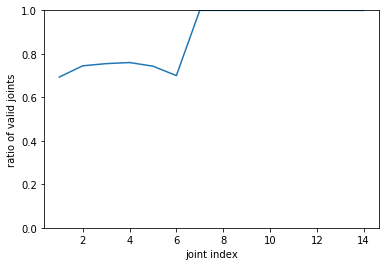

In [4]:
numImages = len(met_dataset.info)
print("number of images = {}".format(numImages))

validJoints = list()
for i, info in enumerate(met_dataset.info):
    #print(info[0])
    #validJoints.append(info[0])
    validJoints.append(info[0][:,0])   # only need X part of valid joints flag
validJoints = np.array(validJoints)  
#print(validJoints)

print(np.sum(validJoints,axis=0))

jointIndex = np.linspace(1,14,14)
plt.plot(jointIndex,np.sum(validJoints,axis=0)/numImages)
plt.ylim(0,1)
plt.xlabel('joint index')
plt.ylabel('ratio of valid joints')




## There are images without HEAD TOP!!!

In [ ]:
# images without joint 14 (head top)
idxMissing = list()
for i, info in enumerate(met_dataset.info):
    if validJoints[i,13] == 0:
        print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = met_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/2),2,i+1)

    img=met_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])

 

In [ ]:

# # let's plot some of them  manually  
# plt.subplot(121)
# img=met_dataset.get_original_image(89)
# plt.imshow(img[:,:,::-1])

# plt.subplot(122)
# img=met_dataset.get_original_image(379)
# plt.imshow(img[:,:,::-1])


## Let's check joints in upper body

In [ ]:
# how many images are missing any joint in upper body?    # increased from 61 to 90 (2018. 6. 18)
sum(np.sum(validJoints[:,6:],axis=1) != 8)

In [ ]:
imageIDlistUB = list()
imageIDlistMissing = list()
idxListMissing = list()
for i, info in enumerate(met_dataset.info):
    image, joints, is_valid_joints, misc = met_dataset.get_example(i)
    #print(i, id)
        
    id = misc['image_id']
    if not np.all(validJoints[i,6:]):
        #print(i)
        #idxMissing.append(i)
        #print(info)


        
        imageIDlistMissing.append(id)
        idxListMissing.append(i)
    else:
        imageIDlistUB.append(id)

# for i in range(len(idxListMissing)):
#     idx = idxListMissing[i]
#     #print(idx)
#     plt.subplot(np.ceil(len(idxListMissing)/4),4,i+1)

#     img=met_dataset.get_original_image(idx)
#     plt.imshow(img[:,:,::-1])
#     plt.axis('off')

print(len(imageIDlistUB))
print(len(imageIDlistMissing))

In [ ]:
#idxListMissing

## generate list with whole upper body joints!

In [ ]:
import pandas as pd
from tools import met

# read the csv file again
MET2_joints=pd.read_csv(CSV_FILENAME,header=None) # ,index_col=0)
print(len(MET2_joints))

MET2_joints.columns=met.generateColumnNames(includeMET=False, includeLabel=False)
MET2_joints.head()


# find index of UB images
idxListUB = list()
for i, id in enumerate(MET2_joints["ID"]):
    if id in imageIDlistUB:
        #print(id)
        idxListUB.append(i)
    #else:
        #print("skipp {}".format(id))
#MET2_joints["ID"]=="image/office activities/walking about/1.png"

MET2_joints_UB = MET2_joints.loc[idxListUB]
print(MET2_joints.shape)
print(MET2_joints_UB.shape)

# # select images with whole upper-body joints and save to a file
# MET2_joints_UB = MET2_joints.loc[idxAllUB]
# MET2_joints_UB.head()
MET2_joints_UB.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!
print(len(MET2_joints_UB))

MET2_joints_UB.to_csv('activity_ub.csv',index=False, header=None)

In [ ]:
MET2_joints.head()

In [ ]:
MET2_joints_UB.head()

In [ ]:
# make sure missing image is not included
misc['image_id']
MET2_joints_UB_re=pd.read_csv('activity_ub.csv',header=None) # ,index_col=0)

MET2_joints_UB_re.head()

for missingImageID in imageIDlistMissing:
    if np.sum(MET2_joints_UB_re[0] == missingImageID):
        print('problem!!!')
        print(missingImageID)


In [ ]:
MET2_joints_UB_re[0]


### copy generated files

```
cp activity_ub.csv /var/data/MET2/
scp activity_ub.csv beta.inu.ac.kr:/var/data/MET2/
scp activity_ub.csv omega.inu.ac.kr:/var/data/MET2/
```

## Further analysis for MET & class lables
Code from `shuffleData.ipynb`

In [ ]:
# give column names 
numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

MET2_joints.columns = colNames
MET2_joints_UB.columns = colNames
MET2_joints.head()
MET2_joints_UB.head()

In [ ]:
# 1. generate (activity,MET) dictionary in the increasing order of MET

#numClass=16     # whole model
numClass=10    # without objects

from tools import met
activity_MET = met.generate_activity_MET_dict(numClass)

print(activity_MET)
# for act in activity_MET:
#     print(act)

# 2, add MET value and count the number of each activity
MET2_joints, METs, counts =  met.parseActivity(MET2_joints, activity_MET, colName='MET', category=False)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')


MET2_joints.head()


In [ ]:
# 1. add class label index 

%load_ext autoreload
%autoreload 2
from tools import met

# New lable according to ASHARAE (2018. 6. 25)
activity_label = met.generate_activity_label_dict(numClass)
print(activity_label)


# 2. add label value and count the number of each activity
MET2_joints, labels, counts =  met.parseActivity(MET2_joints, activity_label, colName='label', category=True)

# check
print(labels)
print(counts)
plt.plot(labels, counts, 'o')
plt.xlabel('label')
plt.ylabel('count')


MET2_joints.head()


In [ ]:
# save 
MET2_joints.to_csv('activity-met_n{}.csv'.format(numClass),index=False, header=None)
print(MET2_joints.shape)

### repeat for UB data

In [ ]:
# add MET value and count the number of each activity


MET2_joints_UB, METs, counts =  met.parseActivity(MET2_joints_UB, activity_MET, colName='MET', category=False)

# check
print(METs)
print(counts)
plt.plot(METs, counts, 'o')
plt.xlabel('MET')
plt.ylabel('count')

MET2_joints_UB.head()

In [ ]:
# add class label index 

MET2_joints_UB, labels, counts =  met.parseActivity(MET2_joints_UB, activity_label, colName='label', category=True)

# check
print(METs)
print(counts)
plt.plot(labels, counts, 'o')

plt.xlabel('class label')
plt.ylabel('count')

MET2_joints_UB.head()

In [ ]:
MET2_joints_UB.to_csv('activity-met_n{}_ub.csv'.format(numClass),index=False, header=None)
print(MET2_joints_UB.shape)

## copy generated files

### full model (16 classes)
```
cp activity-met_n16.csv /var/data/MET2/
cp activity-met_n16_ub.csv /var/data/MET2/

scp activity-met_n16.csv beta.inu.ac.kr:/var/data/MET2/
scp activity-met_n16_ub.csv beta.inu.ac.kr:/var/data/MET2/

scp activity-met_n16.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_n16_ub.csv omega.inu.ac.kr:/var/data/MET2/

```

### part model (10 classes) (2018. 6. 25)
```
cp activity-met_n10.csv /var/data/MET2/
cp activity-met_n10_ub.csv /var/data/MET2/

scp activity-met_n10.csv beta.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub.csv beta.inu.ac.kr:/var/data/MET2/

scp activity-met_n10.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub.csv omega.inu.ac.kr:/var/data/MET2/

```


In [ ]:
Test

In [ ]:
test_dataset = dataset.PoseDataset(
    "/var/data/MET2/n10_ub_head.csv", 
    "/var/data/MET2/",
    227,
    #fliplr=False, rotate=False,
    fliplr=True, rotate=False,
    #fliplr=True, rotate=True,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,   # 14-point model
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

imageIdx=0
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(221)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(222)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(223)
plt.imshow(image[:,:,::-1])

imageIdx=imageIdx+1
image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)

plt.subplot(224)
plt.imshow(image[:,:,::-1])





In [ ]:


imageIdx = 0   # this image has only upper body
img=test_dataset.get_original_image(imageIdx)


image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)
valid_joints = joints[is_valid_joints].reshape(-1,2)

#bbox=misc['orig_tightest_bbox']
bbox=misc['bbox']


# plot joints
plt.subplot(121)
plt.imshow(img[:,:,::-1])
# plot joints
offsetX = bbox[0]
offsetY = bbox[1]
W = bbox[2]#-bbox[0]
H = bbox[3]#-bbox[1]
print(W,H)
plt.plot((valid_joints[:,0]+0.5)*W+offsetX, (valid_joints[:,1]+0.5)*H+offsetY,'or')

plt.subplot(122)
plt.imshow(image[:,:,::-1])